In [3]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Assuming df is your DataFrame
df = df.iloc[:, :-3]


In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
print("Dimensions:", df.shape)

Dimensions: (5572, 2)


In [8]:
print(df.describe())

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [9]:
print(df['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [11]:
X = df['v2']  # Store the second column 'v2' in variable X
Y = df['v1']  # Store the first column 'v1' in variable Y


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the first column of X_train
X_encoded = tfidf_vectorizer.fit_transform(X)
Y_encoded = tfidf_vectorizer.fit_transform(Y)



In [13]:
import numpy as np

# Convert X_encoded and Y_encoded to arrays
X_array = X_encoded.toarray()
Y_array = Y_encoded.toarray()

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, Y_resampled = ros.fit_resample(X_array, Y_array)


In [14]:
import pandas as pd

# Reshape Y_resampled to 1-dimensional array
Y_resampled_1d = Y_resampled.ravel()

# Convert Y_resampled to a pandas Series
y_resampled_series = pd.Series(Y_resampled_1d)

# Print the count of each unique value in y_resampled
print(y_resampled_series.value_counts())


0    4825
1    4825
Name: count, dtype: int64


In [15]:
y_resampled_series

0       0
1       0
2       1
3       0
4       0
       ..
9645    1
9646    1
9647    1
9648    1
9649    1
Length: 9650, dtype: int32

In [16]:
X_resampled.shape

(9650, 8672)

In [17]:
Y_resampled.shape

(9650, 1)

In [18]:
Y_resampled

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

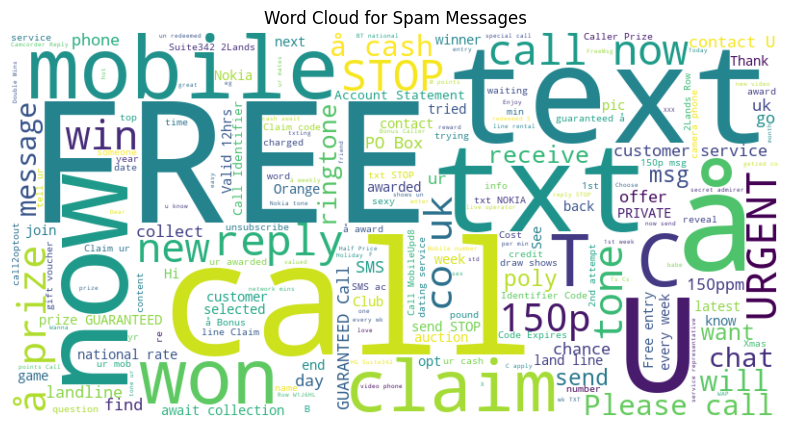

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter text data associated with 'spam' labels
spam_text = df[df['v1'] == 'spam']['v2']

# Combine all spam text into a single string
spam_text_combined = ' '.join(spam_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()


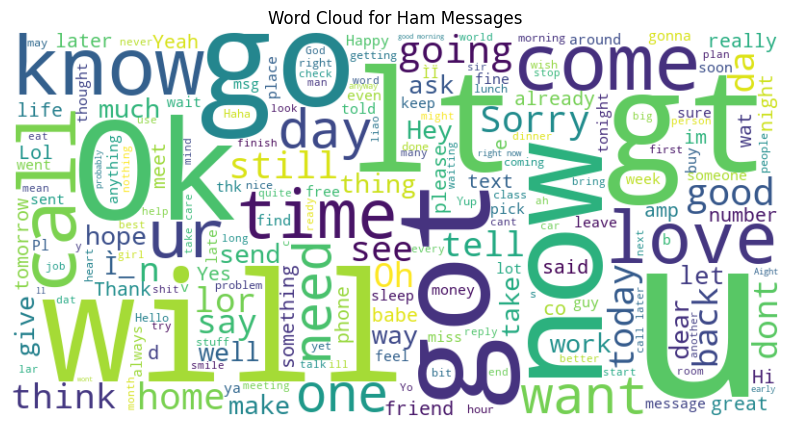

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter text data associated with 'ham' labels
ham_text = df[df['v1'] == 'ham']['v2']

# Combine all ham text into a single string
ham_text_combined = ' '.join(ham_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['v1'])  # Assuming 'label' is the target column
y = df['v1']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the train and test sets to verify
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (7720, 8672) (7720, 1)
Test set shape: (1930, 8672) (1930, 1)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
lr = LogisticRegression()

# Fit the model on the encoded training data
lr.fit(X_train, y_train)

# Make predictions on the encoded test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [23]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb = MultinomialNB()

# Fit the model on the encoded training data
nb.fit(X_train, y_train)

# Make predictions on the encoded test data
y_pred_nb = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Model Accuracy: {accuracy_nb:.2f}")

# Print the classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model Accuracy: 0.98
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       985
           1       0.99      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC()

# Fit the model on the encoded training data
svm.fit(X_train, y_train)

# Make predictions on the encoded test data
y_pred_svm = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")

# Print the classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



In [25]:
y_pred_svm

array([0, 0, 0, ..., 1, 1, 0])

In [26]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])